In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [3]:
df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df= df[pd.notnull(df['CustomerID'])]

In [8]:
filterd_df = df[['Country', 'CustomerID']].drop_duplicates()

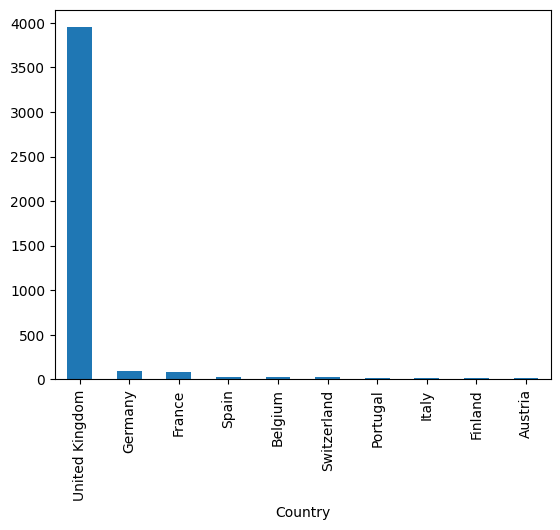

In [13]:
filterd_df.Country.value_counts()[:10].plot(kind = 'bar');

In [14]:
uk_df = df[df.Country == 'United Kingdom']

In [15]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  int64  
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [17]:
uk_df.describe()

Quantity      UnitPrice     CustomerID
count  361878.000000  361878.000000  361878.000000
mean       11.077029       3.256007   15547.871368
std       263.129266      70.654731    1594.402590
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   14194.000000
50%         4.000000       1.950000   15514.000000
75%        12.000000       3.750000   16931.000000
max     80995.000000   38970.000000   18287.000000

In [20]:
uk_df = uk_df[(uk_df['Quantity']>0)]

In [22]:
uk_df = uk_df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
uk_df.head()


CustomerID     InvoiceDate InvoiceNo  Quantity  UnitPrice
0     17850.0  12/1/2010 8:26    536365         6       2.55
1     17850.0  12/1/2010 8:26    536365         6       3.39
2     17850.0  12/1/2010 8:26    536365         8       2.75
3     17850.0  12/1/2010 8:26    536365         6       3.39
4     17850.0  12/1/2010 8:26    536365         6       3.39

In [24]:
uk_df['InvoiceDate'].min(),uk_df['InvoiceDate'].max()

('1/10/2011 10:32', '9/9/2011 9:52')

In [25]:
uk_df['InvoiceDate'] = pd.to_datetime(uk_df['InvoiceDate'])

In [26]:
uk_df['InvoiceDate'].min(),uk_df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [28]:
uk_df['TotalPrice'] = uk_df['Quantity'] * uk_df['UnitPrice']


In [43]:
PRESENT = dt.datetime(2011, 12, 10)

rfm= uk_df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [44]:
rfm

InvoiceDate  InvoiceNo  TotalPrice
CustomerID                                    
12346.0             325          1    77183.60
12747.0               2        103     4196.01
12748.0               0       4596    33719.73
12749.0               3        199     4090.88
12820.0               3         59      942.34
...                 ...        ...         ...
18280.0             277         10      180.60
18281.0             180          7       80.82
18282.0               7         12      178.05
18283.0               3        756     2094.88
18287.0              42         70     1837.28

[3921 rows x 3 columns]

In [45]:
rfm.columns=['recency', 'frequency', 'monetary'] 

In [46]:
rfm['recency'] = rfm['recency'].astype(int)

In [47]:
rfm.head()

recency  frequency  monetary
CustomerID                              
12346.0         325          1  77183.60
12747.0           2        103   4196.01
12748.0           0       4596  33719.73
12749.0           3        199   4090.88
12820.0           3         59    942.34

In [49]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [50]:
rfm.head()


recency  frequency  monetary r_quartile f_quartile m_quartile
CustomerID                                                               
12346.0         325          1  77183.60          4          4          1
12747.0           2        103   4196.01          1          1          1
12748.0           0       4596  33719.73          1          1          1
12749.0           3        199   4090.88          1          1          1
12820.0           3         59    942.34          1          2          2

In [51]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()


recency  frequency  monetary r_quartile f_quartile m_quartile  \
CustomerID                                                                  
12346.0         325          1  77183.60          4          4          1   
12747.0           2        103   4196.01          1          1          1   
12748.0           0       4596  33719.73          1          1          1   
12749.0           3        199   4090.88          1          1          1   
12820.0           3         59    942.34          1          2          2   

           RFM_Score  
CustomerID            
12346.0          441  
12747.0          111  
12748.0          111  
12749.0          111  
12820.0          122

In [54]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()


recency  frequency   monetary r_quartile f_quartile m_quartile  \
CustomerID                                                                   
18102.0           0        431  259657.30          1          1          1   
17450.0           8        337  194550.79          1          1          1   
17511.0           2        963   91062.38          1          1          1   
16684.0           4        277   66653.56          1          1          1   
14096.0           4       5111   65164.79          1          1          1   

           RFM_Score  
CustomerID            
18102.0          111  
17450.0          111  
17511.0          111  
16684.0          111  
14096.0          111